In [ ]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# importing or loading the dataset
data = pd.read_csv('spambase.data')

In [ ]:
# Perform PCA with all components
X = data.drop(columns=['capital_run_length_total'])
y = data['capital_run_length_total']


In [ ]:
# performing preprocessing part
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [ ]:
# Perform PCA with all components
pca = PCA(n_components=X_std.shape[1])
X_pca = pca.fit_transform(X_std)

# Get the explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_

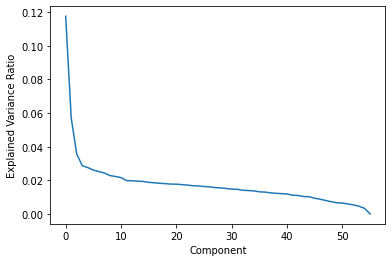

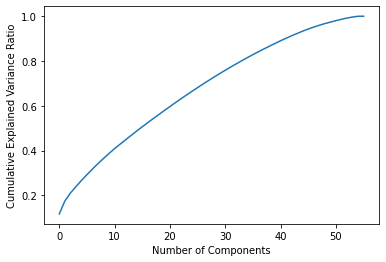

In [ ]:
# Get the cumulative sum of explained variance ratios
cumulative_var_ratio = np.cumsum(explained_variance)

# Plot the explained variance ratio and cumulative explained variance ratio
import matplotlib.pyplot as plt
plt.plot(explained_variance)
plt.xlabel('Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

plt.plot(cumulative_var_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()


In [ ]:
# Choose the number of components based on the explained variance ratio
num_components = 0
for i in range(len(cumulative_var_ratio)):
    if cumulative_var_ratio[i] >= 0.95:
        num_components = i + 1
        break

# Perform PCA with the chosen number of components
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_std)

# Create a new DataFrame for the principal components
pca_df = pd.DataFrame(data=X_pca, columns=['PC{}'.format(i+1) for i in range(num_components)])


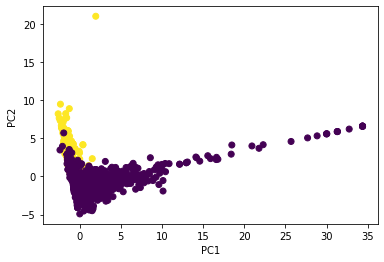

The number of components identified are: 


47

In [ ]:
# Reset the index of the target variable
y = y.reset_index(drop=True)

# Concatenate the principal components with the target variable
final_df = pd.concat([pca_df, y], axis=1) 

# Visualize the principal components
plt.scatter(final_df['PC1'], final_df['PC2'], c=final_df['capital_run_length_total'])
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

print('The number of components identified are: ')
num_components